<a href="https://colab.research.google.com/github/farrasdny/TugasSebelumUTSOULAD_AnalisisBigData/blob/main/TugasSebelumUTS_AnalisisBigData_OULAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS SEBELUM UTS OULAD** (Clustering Using K-Means)


**Nama**: Farras Danyka Putra **NIM**: 202010370311118





**IMPORT LIBRARY KEBUTUHAN**


1.   **NumPy (np)**: NumPy adalah library fundamental untuk komputasi numerik dalam Python. Ini menyediakan array dan operasi array yang sangat efisien, yang berguna dalam pengolahan data numerik.
2.   **Pandas (pd)**: Pandas adalah library yang digunakan untuk analisis data, memungkinkan Anda untuk bekerja dengan data dalam bentuk DataFrame yang nyaman. Anda dapat mengimpor, membersihkan, dan memanipulasi data dengan Pandas.
3. **LabelEncoder**: LabelEncoder adalah bagian dari scikit-learn yang digunakan untuk mengkodekan label kategoris menjadi angka, yang diperlukan ketika Anda ingin menggunakan algoritma machine learning yang memerlukan input numerik.
4. **Matplotlib (plt)**: Matplotlib adalah library untuk visualisasi data yang kuat. Anda dapat menggunakan Matplotlib untuk membuat grafik dan plot data dalam berbagai format.
5. **Seaborn (sns)**: Seaborn adalah library yang berbasis di atas Matplotlib dan dirancang khusus untuk visualisasi data statistik. Ini membuatnya mudah untuk membuat plot yang indah dan informatif.
6. **train_test_split**: train_test_split adalah fungsi dari scikit-learn yang digunakan untuk membagi dataset menjadi subset data pelatihan dan pengujian, yang penting dalam pengembangan model machine learning.
7. **autoviz**: autoviz adalah library yang digunakan untuk membuat visualisasi otomatis dari dataset, memungkinkan Anda dengan cepat memahami karakteristik data.
8. **accuracy_score**: accuracy_score adalah fungsi dari scikit-learn yang digunakan untuk menghitung akurasi model dalam klasifikasi.
9. **KMeans**: KMeans adalah implementasi algoritma K-Means Clustering dalam scikit-learn, yang digunakan untuk pengelompokan data.



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import autoviz
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_dataset/analisis_big_data'

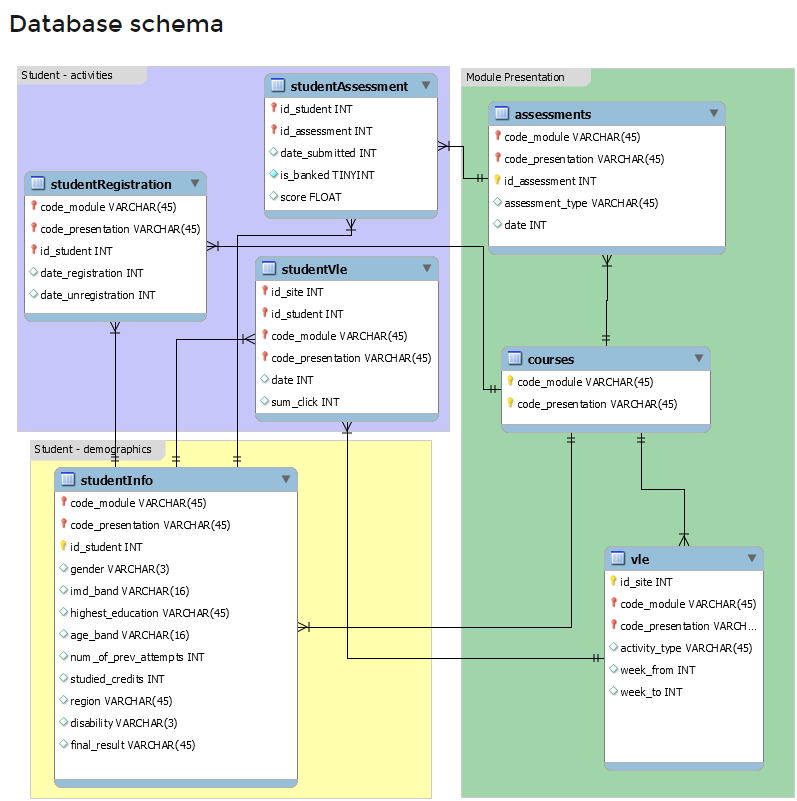

Mengambil dua data yang akan di integrasi, yaitu studentRegistration dan studentInfo dikarenakan dua data tersebut memiliki hubungan di data schema

In [4]:
# Define the data
d1 = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/analisis_big_data/studentRegistration.csv')

d2 = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/analisis_big_data/studentInfo.csv')

In [5]:
d1.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [6]:
d1.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [7]:
d2.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [8]:
d2.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


# **MERGE DATA**

merge dataset adalah proses menggabungkan dua atau lebih dataset menjadi satu dataset tunggal. Tujuan dari penggabungan dataset adalah untuk menggabungkan data yang memiliki hubungan atau elemen bersama agar dapat dianalisis atau diproses bersama-sama.

In [9]:
data1 = pd.DataFrame(d1)
data2 = pd.DataFrame(d2)

Menggabungkan studentRegistration & studentInfo berdasarkan id_student, dikarenakan kedua data tersebut memiliki atribut id

In [10]:
# Merge dataset berdasarkan kolom "id_student"
merged_dataset = pd.merge(data1, data2, on='id_student', how='inner')

Mengecek dan menghapus duplikasi dari id_student pada hasil merge data, karena id bersifat unique sehingga tidak ada duplikasi dari setiap id

In [11]:
# Cek duplikasi id_student
print("Jumlah duplikasi: ", merged_dataset.duplicated('id_student').sum())

Jumlah duplikasi:  12016


In [12]:
# Menghapus duplikasi, karna id_student tidak ada yang sama
merged_dataset = merged_dataset.drop_duplicates('id_student')

In [13]:
# Hasil integrasi
merged_dataset

,code_module_x,code_presentation_x,id_student,date_registration,date_unregistration,code_module_y,code_presentation_y,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,NaN,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,NaN,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,NaN,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,GGG,2014J,2640965,-4.0,NaN,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
40797,GGG,2014J,2645731,-23.0,NaN,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
40798,GGG,2014J,2648187,-129.0,NaN,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
40799,GGG,2014J,2679821,-49.0,101.0,GGG,2014J,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


Menampilkan 5 data teratas

In [14]:
merged_dataset.head()

,code_module_x,code_presentation_x,id_student,date_registration,date_unregistration,code_module_y,code_presentation_y,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,NaN,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,NaN,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,NaN,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


Menampilkan 5 data terbawah

In [15]:
merged_dataset.tail()

,code_module_x,code_presentation_x,id_student,date_registration,date_unregistration,code_module_y,code_presentation_y,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
40796,GGG,2014J,2640965,-4.0,NaN,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
40797,GGG,2014J,2645731,-23.0,NaN,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
40798,GGG,2014J,2648187,-129.0,NaN,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
40799,GGG,2014J,2679821,-49.0,101.0,GGG,2014J,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
40800,GGG,2014J,2684003,-28.0,NaN,GGG,2014J,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


Visualisasi atribut studied_credits, bisa disimpulkan bahwa siswa dengan credits 60 paling mendominasi

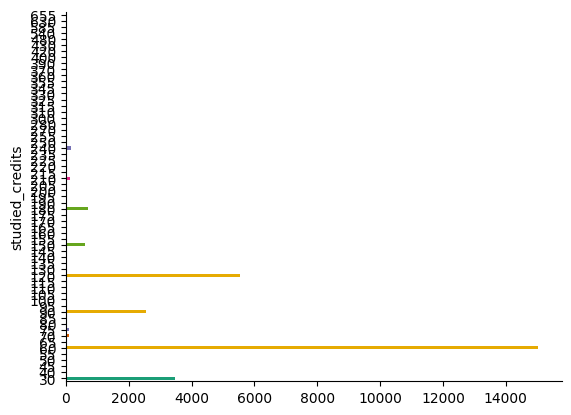

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_dataset.groupby('studied_credits').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **PREPROCESSING**

Preprocessing data adalah serangkaian langkah atau proses yang dilakukan pada data mentah sebelum data tersebut digunakan untuk analisis atau pemodelan. Tujuan dari preprocessing data adalah untuk membersihkan, mengorganisir, dan mengubah data mentah menjadi bentuk yang lebih cocok untuk analisis atau penggunaan dalam berbagai aplikasi, termasuk machine learning.

Mengecek missing value dari setiap atribut, terdapat 38 missing value pada atribut date_registration, 19817 missing value pada atribut date_unregistration, dan terdapat 971 missing value pada atribut imd_band. Missing value tersebut harus dihapus dikarenakan akan mempengaruhi hasil dari clustering ini.

In [17]:
merged_dataset.isnull().sum()

code_module_x               0
code_presentation_x         0
id_student                  0
date_registration          38
date_unregistration     19817
code_module_y               0
code_presentation_y         0
gender                      0
region                      0
highest_education           0
imd_band                  971
age_band                    0
num_of_prev_attempts        0
studied_credits             0
disability                  0
final_result                0
dtype: int64

In [18]:
print("Jumlah duplikasi: ", merged_dataset.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
merged_dataset = merged_dataset.dropna(how='any')

In [20]:
merged_dataset.isnull().sum()

code_module_x           0
code_presentation_x     0
id_student              0
date_registration       0
date_unregistration     0
code_module_y           0
code_presentation_y     0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

Mengecek tipe data dari setiap atribut

In [21]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8726 entries, 2 to 40799
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module_x         8726 non-null   object 
 1   code_presentation_x   8726 non-null   object 
 2   id_student            8726 non-null   int64  
 3   date_registration     8726 non-null   float64
 4   date_unregistration   8726 non-null   float64
 5   code_module_y         8726 non-null   object 
 6   code_presentation_y   8726 non-null   object 
 7   gender                8726 non-null   object 
 8   region                8726 non-null   object 
 9   highest_education     8726 non-null   object 
 10  imd_band              8726 non-null   object 
 11  age_band              8726 non-null   object 
 12  num_of_prev_attempts  8726 non-null   int64  
 13  studied_credits       8726 non-null   int64  
 14  disability            8726 non-null   object 
 15  final_result        

LabelEncoder adalah mengkodekan label kategoris menjadi bilangan bulat (integer), sehingga data tersebut dapat digunakan dalam algoritma machine learning yang memerlukan data dalam bentuk numerik. Dalam program ini, saya mengubah tipe data gender menjadi numerik sehingga bisa dapat dilakukan pengelompokkan final_result berdasarkan gender

In [22]:
labelencoder = LabelEncoder()
merged_dataset['gender'] = labelencoder.fit_transform(merged_dataset['gender'])

<ipython-input-22-2a00f079303e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataset['gender'] = labelencoder.fit_transform(merged_dataset['gender'])


In [23]:
merged_dataset

,code_module_x,code_presentation_x,id_student,date_registration,date_unregistration,code_module_y,code_presentation_y,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
2,AAA,2013J,30268,-92.0,12.0,AAA,2013J,0,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
15,AAA,2013J,65002,-180.0,96.0,AAA,2013J,0,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn
25,AAA,2013J,94961,-170.0,72.0,AAA,2013J,1,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn
35,AAA,2013J,106247,5.0,175.0,AAA,2013J,1,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn
47,AAA,2013J,129955,-197.0,135.0,AAA,2013J,1,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Withdrawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40784,GGG,2014J,2338614,-23.0,58.0,GGG,2014J,0,Scotland,A Level or Equivalent,0-10%,35-55,0,30,Y,Withdrawn
40785,GGG,2014J,2342238,-45.0,74.0,GGG,2014J,1,Ireland,HE Qualification,80-90%,0-35,0,30,N,Withdrawn
40786,GGG,2014J,2357806,-128.0,73.0,GGG,2014J,0,Ireland,Lower Than A Level,40-50%,35-55,0,30,N,Withdrawn
40794,GGG,2014J,2608143,-45.0,48.0,GGG,2014J,1,East Midlands Region,HE Qualification,60-70%,35-55,0,30,N,Withdrawn


# **CLUSTERING USING K-MEANS**
K-Means adalah salah satu algoritma pengelompokan (clustering) yang paling populer dan sederhana dalam analisis data. Tujuan utama dari K-Means adalah mengelompokkan data menjadi kelompok-kelompok yang serupa berdasarkan kemiripan atribut atau fitur.

Buat variabel 'X' yang akan digunakan dalam analisis data selanjutny

In [24]:
X = merged_dataset[["studied_credits"]]

Buat variabel untuk menentukan jumlah cluster yang akan dibentuk saat menggunakan algoritma clustering K-Means

In [25]:
n_clusters = 3

Buat sebuah model K-Means clustering dengan menggunakan library scikit-learn (atau sklearn)

In [26]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

kmeans.fit(X) adalah langkah dalam algoritma K-Means Clustering di mana untuk melatih (fit) model K-Means dengan data yang telah Anda persiapkan.

In [27]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

**labels = kmeans.labels_** digunakan untuk mendapatkan hasil pengelompokan data setelah Anda melatih model K-Means.

In [28]:
labels = kmeans.labels_

Membuat atribut baru bernama 'group' untuk menampung hasil dari clustering K-Means

In [29]:
merged_dataset["group"] = labels

<ipython-input-29-f2bd827991a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataset["group"] = labels


# **PROSES PEMBUATAN VISUALISASI CLUSTERING**





Membuat dictionary untuk menghitung jumlah value gender di setiap pengelompokkan

In [30]:
gender_counts = {}
for i in range(n_clusters):
    cluster_data = merged_dataset[labels == i]
    gender_counts[i] = cluster_data["gender"].value_counts()

Menampilkan jumlah value gender di setiap pengelompokkan

In [31]:
for i in range(n_clusters):
    print(f"Cluster {i}:")
    print(gender_counts[i])
    print()

Cluster 0:
1    1907
0    1499
Name: gender, dtype: int64

Cluster 1:
1    2499
0    2224
Name: gender, dtype: int64

Cluster 2:
0    321
1    276
Name: gender, dtype: int64



# **VISUALISASI HASIL CLUSTERING K-MEANS** (studentInfo & studentRegistration)
1. **for i in range(n_clusters)**: Ini adalah loop for yang berjalan sebanyak **n_clusters** kali, di mana **n_clusters **adalah jumlah kluster yang telah ditentukan sebelumnya. Loop ini akan mengiterasi melalui setiap kluster yang telah dibentuk oleh model K-Means.
2. **cluster_data = merged_dataset[merged_dataset["group"] == i]**: Dalam setiap iterasi loop, baris ini digunakan untuk mengambil data yang termasuk dalam kluster tertentu (kluster ke-i). Ini dilakukan dengan mengindeks **merged_dataset** untuk mencari semua data yang memiliki nilai kolom "group" yang sama dengan i. Hasilnya adalah **cluster_data**, yang berisi data dari kluster ke-i.
3. **plt.scatter(cluster_data["studied_credits"], cluster_data["gender"], label=f"group {i}")**: Di sini, Anda menggunakan library matplotlib (plt) untuk membuat scatter plot. Scatter plot digunakan untuk menampilkan data dalam grafik dua dimensi dengan titik-titik yang mewakili data. Anda menggambarkan data dalam kluster ke-i dengan **cluster_data["studied_credits"] **sebagai sumbu x dan **cluster_data["gender"]** sebagai sumbu y. Setiap kluster diwakili oleh titik-titik yang tersebar dalam plot.


*   **cluster_data["studied_credits"]** adalah atribut pada sumbu x, yang mewakili jumlah kredit yang telah dipelajari oleh setiap data dalam kluster.
*   **cluster_data["gender"]** adalah atribut pada sumbu y, yang mewakili jenis kelamin setiap data dalam kluster.
*   **label=f"group {i}** digunakan untuk memberikan label kepada setiap kluster yang digambarkan dalam plot. Label ini akan muncul dalam legenda plot.

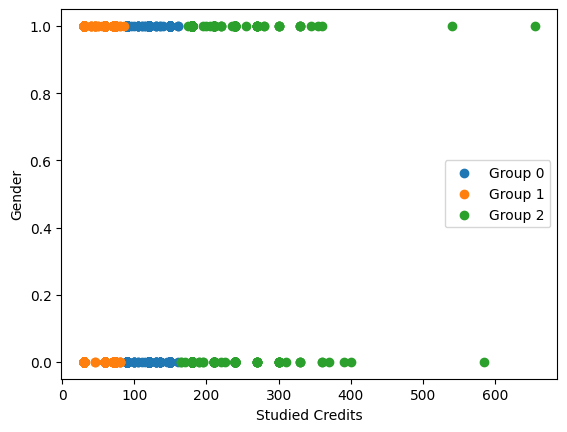

In [32]:
for i in range(n_clusters):
    cluster_data = merged_dataset[labels == i]
    plt.scatter(cluster_data["studied_credits"], cluster_data["gender"], label=f"Group {i}")

plt.xlabel("Studied Credits")
plt.ylabel("Gender")
plt.legend()
plt.show()

In [33]:
cluster_data

,code_module_x,code_presentation_x,id_student,date_registration,date_unregistration,code_module_y,code_presentation_y,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,group
53,AAA,2013J,135335,-29.0,30.0,AAA,2013J,0,East Anglian Region,Lower Than A Level,20-30%,0-35,0,180,N,Withdrawn,2
63,AAA,2013J,141377,-110.0,129.0,AAA,2013J,1,South West Region,A Level or Equivalent,90-100%,0-35,0,345,N,Withdrawn,2
127,AAA,2013J,235507,-79.0,109.0,AAA,2013J,1,Yorkshire Region,A Level or Equivalent,90-100%,0-35,0,240,N,Withdrawn,2
151,AAA,2013J,268733,-17.0,187.0,AAA,2013J,1,East Anglian Region,A Level or Equivalent,30-40%,0-35,0,180,N,Withdrawn,2
170,AAA,2013J,292923,-162.0,-121.0,AAA,2013J,0,South East Region,A Level or Equivalent,90-100%,35-55,0,180,N,Withdrawn,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38101,FFF,2014J,697042,-1.0,69.0,FFF,2014J,1,North Western Region,Lower Than A Level,20-30%,0-35,0,180,N,Withdrawn,2
38151,FFF,2014J,1629444,-38.0,-29.0,FFF,2014J,0,East Anglian Region,A Level or Equivalent,70-80%,35-55,0,180,Y,Withdrawn,2
38213,FFF,2014J,2146013,-133.0,-130.0,FFF,2014J,1,West Midlands Region,Lower Than A Level,20-30%,0-35,0,210,Y,Withdrawn,2
38257,FFF,2014J,2486215,-142.0,-65.0,FFF,2014J,1,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,180,N,Withdrawn,2


Inertia adalah salah satu metrik evaluasi yang digunakan dalam pengelompokan (clustering), terutama ketika menggunakan algoritma K-Means. Hasil dari metrik inertia adalah jumlah kuadrat jarak antara setiap data dalam kluster dengan pusat kluster terdekat.

In [34]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 2776960.508248358


# **KESIMPULAN**
Pada dataset OULAD, hasil clustering menggunakan K-Means merge dari data studentInfo dan studentRegistration memiliki intertia yang baik, sehingga pengelompokkan studied_credits berdasarkan gender memiliki hasil visualisasi yang baik dan mudah untuk dipahami.